In [68]:
import os
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

In [69]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [70]:
all_data.shape

(186850, 6)

In [71]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [72]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<Axes: >

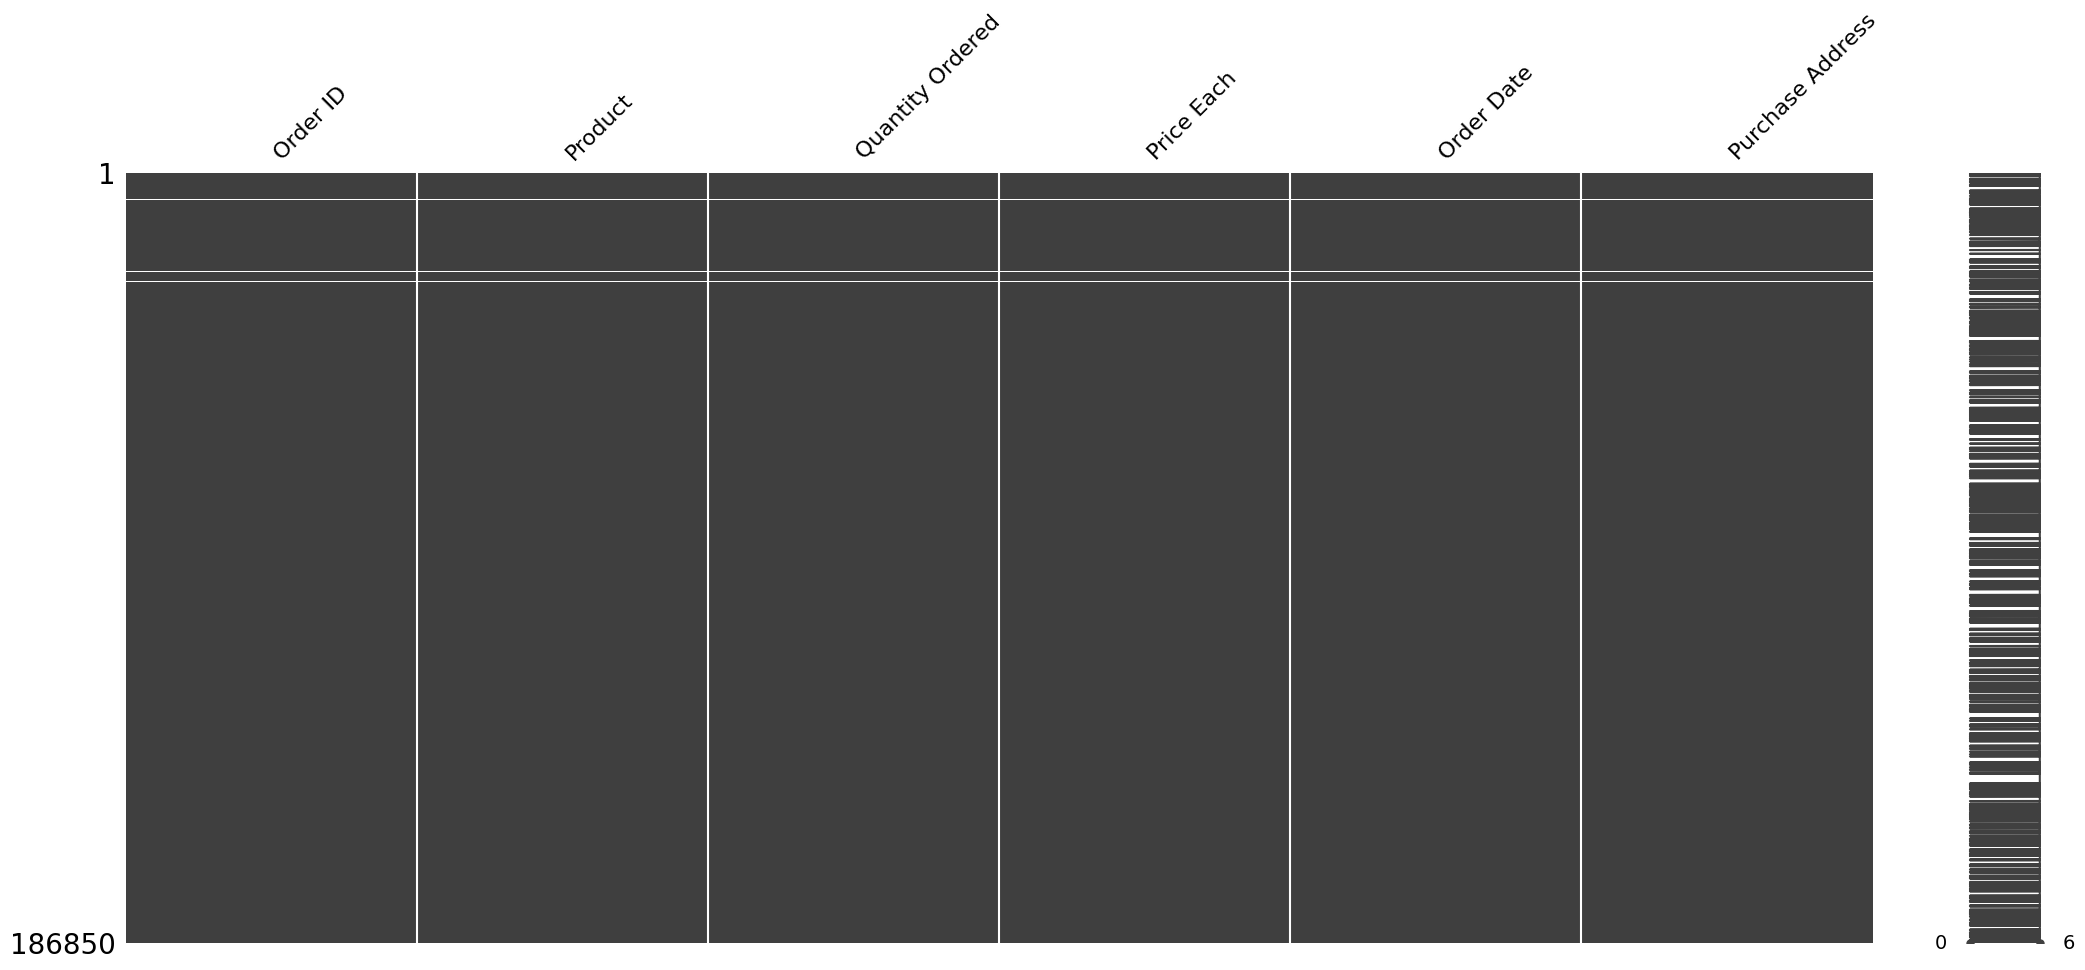

In [73]:
msno.matrix(all_data)

In [74]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [75]:
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [76]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [77]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [78]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

C:\Users\nupur\AppData\Local\Temp\ipykernel_39568\3704723626.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [79]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [80]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [81]:
month_group=all_data.groupby(['Month']).sum()
month_group

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",Dallas (TX)New York City (NY)New York City ...,1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",Portland (ME)San Francisco (CA)New York City...,2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",San Francisco (CA)Portland (OR)San Francisco...,2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",Dallas (TX)Boston (MA)Los Angeles (CA)Los A...,3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",Portland (OR)San Francisco (CA)Boston (MA)B...,3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",Portland (ME)San Francisco (CA)Los Angeles ...,2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",Atlanta (GA)Seattle (WA)Atlanta (GA)Atlanta...,2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",Seattle (WA)Dallas (TX)Portland (OR)Los Ang...,2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",San Francisco (CA)San Francisco (CA)Seattle ...,2097560.13


C:\Users\nupur\AppData\Local\Temp\ipykernel_39568\3172789537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(data=month_group,x=month_group.index,y='Sales',palette='husl')


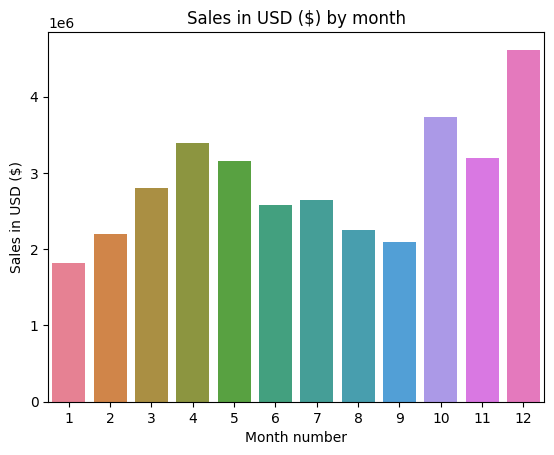

In [58]:
g=sns.barplot(data=month_group,x=month_group.index,y='Sales',palette='husl')
g.set_title("Sales in USD ($) by month")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

C:\Users\nupur\AppData\Local\Temp\ipykernel_39568\1922348215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(data=group_city,x=group_city.index,y='Sales',palette='husl')


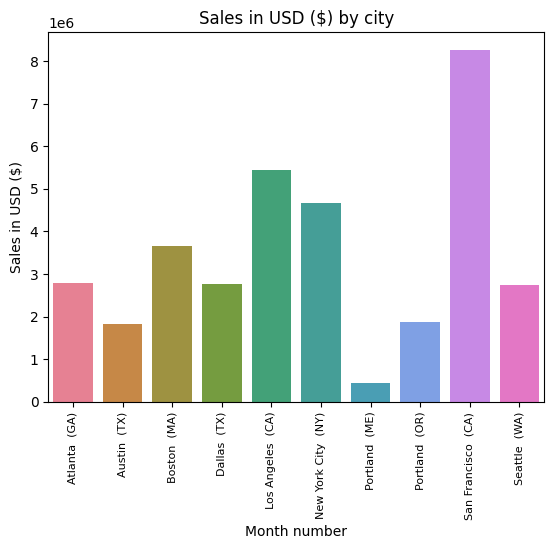

In [82]:
g=sns.barplot(data=group_city,x=group_city.index,y='Sales',palette='husl')
g.set_title("Sales in USD ($) by city")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(rotation='vertical', size=8)
plt.show()

C:\Users\nupur\AppData\Local\Temp\ipykernel_39568\1116667011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl')


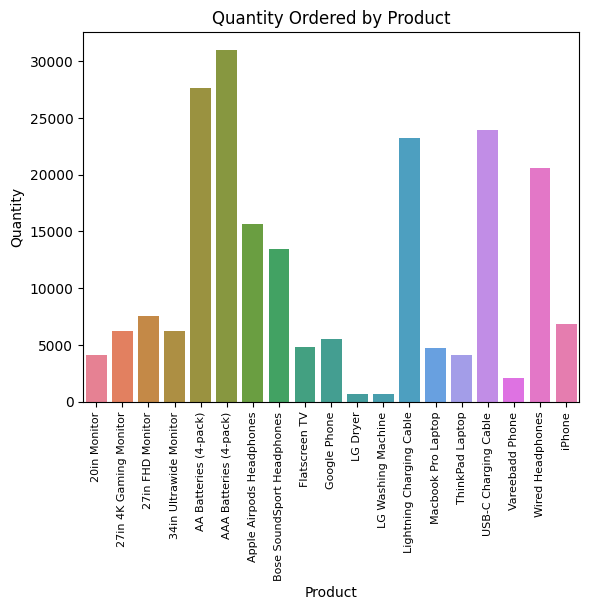

In [31]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()[['Quantity Ordered']]

g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl')
g.set_title("Quantity Ordered by Product")
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [83]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\nupur\AppData\Local\Temp\ipykernel_39568\3593477360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [84]:
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [85]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Product
1    171301
2      6778
3       340
4        17
5         1
Name: count, dtype: int64

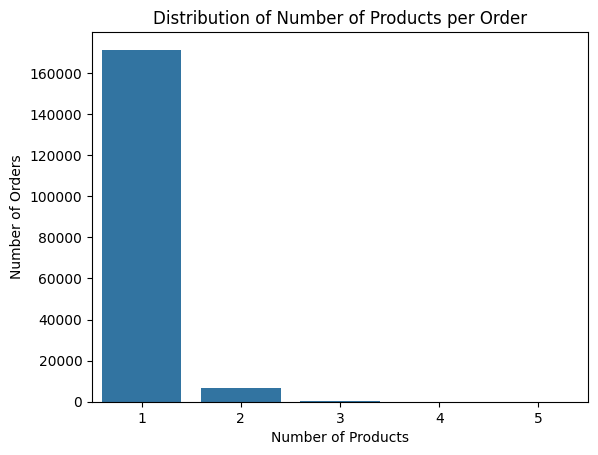

In [86]:
product_counts = all_data.groupby('Order ID')['Product'].count().value_counts()
display(product_counts)
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Products per Order')
plt.show()

In [94]:
df_agg = all_data.groupby('Order ID')['Product'].agg(lambda x: ','.join(x)).reset_index().drop('Order ID',axis=1)

In [95]:
transactions = df_agg['Product'].apply(lambda t: t.split(',')).tolist()
transactions

[['iPhone'],
 ['Lightning Charging Cable'],
 ['Wired Headphones'],
 ['27in FHD Monitor'],
 ['Wired Headphones'],
 ['AAA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['USB-C Charging Cable'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['Macbook Pro Laptop'],
 ['AAA Batteries (4-pack)'],
 ['27in FHD Monitor'],
 ['Flatscreen TV'],
 ['27in FHD Monitor'],
 ['Vareebadd Phone'],
 ['Apple Airpods Headphones'],
 ['USB-C Charging Cable'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['Google Phone'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['AAA Batteries (4-pack)'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['27in 4K Gaming Monitor'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['Wired Headphones

In [89]:
products=all_data['Product'].unique().tolist()
products

['USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Google Phone',
 'Wired Headphones',
 'Macbook Pro Laptop',
 'Lightning Charging Cable',
 '27in 4K Gaming Monitor',
 'AA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'AAA Batteries (4-pack)',
 'iPhone',
 'Flatscreen TV',
 '27in FHD Monitor',
 '20in Monitor',
 'LG Dryer',
 'ThinkPad Laptop',
 'Vareebadd Phone',
 'LG Washing Machine',
 '34in Ultrawide Monitor']

In [96]:
encoder = TransactionEncoder().fit(transactions)

onehot = encoder.transform(transactions)

onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178432,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
178433,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
178435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [97]:
support = onehot.mean()
print(support.sort_values(ascending=False))

USB-C Charging Cable          0.122480
Lightning Charging Cable      0.121074
AAA Batteries (4-pack)        0.115408
AA Batteries (4-pack)         0.115122
Wired Headphones              0.105623
Apple Airpods Headphones      0.087005
Bose SoundSport Headphones    0.074525
27in FHD Monitor              0.042020
iPhone                        0.038333
27in 4K Gaming Monitor        0.034886
34in Ultrawide Monitor        0.034600
Google Phone                  0.030946
Flatscreen TV                 0.026867
Macbook Pro Laptop            0.026458
ThinkPad Laptop               0.023123
20in Monitor                  0.022966
Vareebadd Phone               0.011573
LG Washing Machine            0.003732
LG Dryer                      0.003620
dtype: float64


In [98]:
frequent_itemsets = apriori(onehot, min_support = 0.002, max_len = 3, use_colnames = True)
print(f'len of frequent itemsets: {len(frequent_itemsets)}')
print(frequent_itemsets)

len of frequent itemsets: 25
     support                                 itemsets
0   0.022966                           (20in Monitor)
1   0.034886                 (27in 4K Gaming Monitor)
2   0.042020                       (27in FHD Monitor)
3   0.034600                 (34in Ultrawide Monitor)
4   0.115122                  (AA Batteries (4-pack))
5   0.115408                 (AAA Batteries (4-pack))
6   0.087005               (Apple Airpods Headphones)
7   0.074525             (Bose SoundSport Headphones)
8   0.026867                          (Flatscreen TV)
9   0.030946                           (Google Phone)
10  0.003620                               (LG Dryer)
11  0.003732                     (LG Washing Machine)
12  0.121074               (Lightning Charging Cable)
13  0.026458                     (Macbook Pro Laptop)
14  0.023123                        (ThinkPad Laptop)
15  0.122480                   (USB-C Charging Cable)
16  0.011573                        (Vareebadd Phone)

In [99]:
rules = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.002)
print(f'The number of rules is {len(rules)}')
print('\n')
print('TABLE OF METRICS FOR RULES')
rules.sort_values('lift',ascending=False)

The number of rules is 12


TABLE OF METRICS FOR RULES


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865,0.331900
2,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374,0.366521
8,(USB-C Charging Cable),(Vareebadd Phone),0.122480,0.011573,0.002062,0.016838,1.454996,0.000645,1.005356,0.356360
9,(Vareebadd Phone),(USB-C Charging Cable),0.011573,0.122480,0.002062,0.178208,1.454996,0.000645,1.067813,0.316374
6,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370,0.188077
7,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880,0.205782
4,(Wired Headphones),(Google Phone),0.105623,0.030946,0.002365,0.022391,0.723534,-0.000904,0.991248,-0.299343
5,(Google Phone),(Wired Headphones),0.030946,0.105623,0.002365,0.076422,0.723534,-0.000904,0.968383,-0.282798
11,(Wired Headphones),(iPhone),0.105623,0.038333,0.002589,0.024513,0.639482,-0.001460,0.985833,-0.386632
10,(iPhone),(Wired Headphones),0.038333,0.105623,0.002589,0.067544,0.639482,-0.001460,0.959163,-0.369577
